# Aula 1

## Carregando os dados

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = (10, 6)
mpl.rcParams['font.size'] = 22

/home/emmanuel/.pyenv/versions/3.6.8/envs/cranium/lib/python3.6/site-packages/pandas/compat/__init__.py:120: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)
/home/emmanuel/.pyenv/versions/3.6.8/envs/cranium/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/emmanuel/.pyenv/versions/3.6.8/envs/cranium/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/emmanuel/.pyenv/versions/3.6.8/envs/cranium/lib/p

In [2]:
passageiros = pd.read_csv('Passageiros.csv')

In [3]:
passageiros.head()

,tempo,passageiros
0,1949.000000,112
1,1949.083333,118
2,1949.166667,132
3,1949.250000,129
4,1949.333333,121


<AxesSubplot:xlabel='tempo', ylabel='passageiros'>

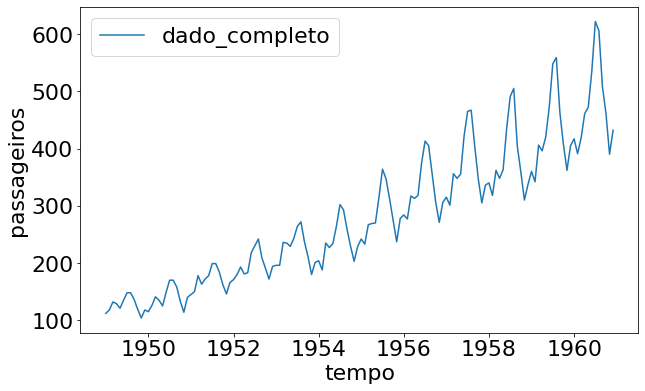

In [4]:
sns.lineplot(x='tempo',y='passageiros', data=passageiros,label='dado_completo') 

## Escalando os dados

In [5]:
sc = StandardScaler()

In [6]:
sc.fit(passageiros)

StandardScaler()

In [7]:
dado_escalado = sc.transform(passageiros)

In [8]:
x=dado_escalado[:,0] #Features - Características - Tempo
y=dado_escalado[:,1] #Alvo - Número de passageiros

Text(0.5, 0, 'Data')

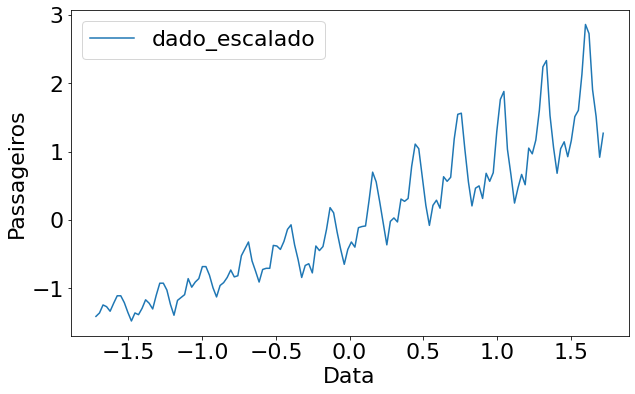

In [9]:
sns.lineplot(x=x,y=y,label='dado_escalado') 
plt.ylabel('Passageiros')
plt.xlabel('Data')

## Dividindo em treino e teste

In [10]:
tamanho_treino = int(len(passageiros)*0.9) #Pegando 90% dos dados para treino
tamanho_teste = len(passageiros)-tamanho_treino #O resto vamos reservar para teste

In [11]:
xtreino = x[0:tamanho_treino]
ytreino = y[0:tamanho_treino]

In [12]:
xteste = x[tamanho_treino:len(passageiros)]
yteste = y[tamanho_treino:len(passageiros)]

<AxesSubplot:>

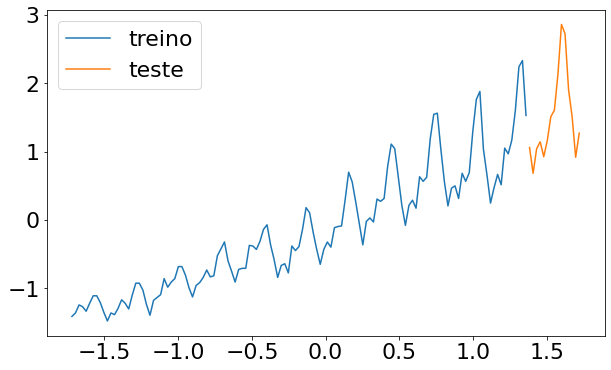

In [13]:
sns.lineplot(x=xtreino,y=ytreino,label='treino') 
sns.lineplot(x=xteste,y=yteste,label='teste') 

# Aula 2

## Regressão Linear

In [14]:
regressor = Sequential()

In [15]:
regressor.add(Dense(1, input_dim=1, kernel_initializer='Ones', 
                    activation='linear',use_bias=False))

In [16]:
regressor.compile(loss='mean_squared_error',optimizer='adam')

In [17]:
regressor.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 1         
Total params: 1
Trainable params: 1
Non-trainable params: 0
_________________________________________________________________


In [18]:
regressor.fit(xtreino,ytreino)

129/129 [==============================] - 0s 658us/sample - loss: 0.1284


In [19]:
y_predict= regressor.predict(xtreino) #Prevendo os dados de treino (o ajuste)

<AxesSubplot:>

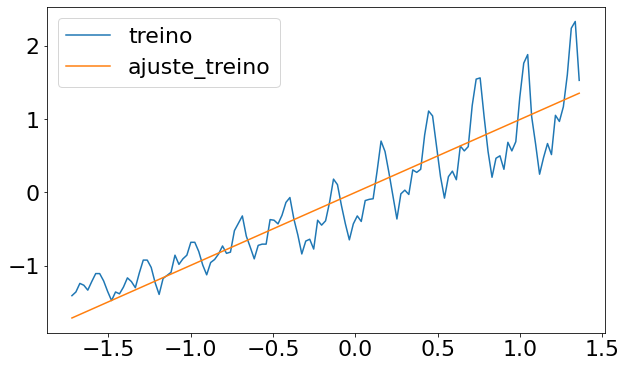

In [20]:
sns.lineplot(x=xtreino,y=ytreino,label='treino')
sns.lineplot(x=xtreino,y=y_predict[:,0],label='ajuste_treino')

In [21]:
d = {'tempo': xtreino, 'passageiros': y_predict[:,0]}
resultados = pd.DataFrame(data=d)

In [22]:
resultados

,tempo,passageiros
0,-1.720064,-1.711999
1,-1.696007,-1.688055
2,-1.671950,-1.664111
3,-1.647894,-1.640167
4,-1.623837,-1.616223
...,...,...
124,1.262984,1.257062
125,1.287041,1.281006
126,1.311098,1.304950
127,1.335155,1.328894


In [23]:
resultado_transf = sc.inverse_transform(resultados)

In [24]:
resultado_transf = pd.DataFrame(resultado_transf)
resultado_transf.columns = ['tempo','passageiros']

<AxesSubplot:xlabel='tempo', ylabel='passageiros'>

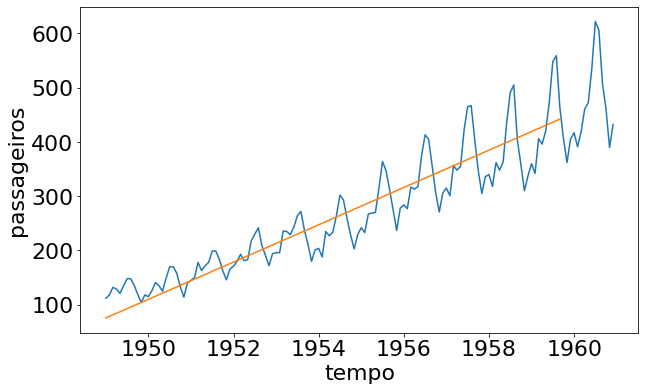

In [25]:
sns.lineplot(x="tempo",y="passageiros",data=passageiros)
sns.lineplot(x="tempo",y="passageiros",data=resultado_transf)

In [26]:
y_predict_teste= regressor.predict(xteste) #Prevendo os dados de teste(o futuro)

In [27]:
d = {'tempo': xteste, 'passageiros': y_predict_teste[:,0]}
resultados_teste = pd.DataFrame(data=d)

In [28]:
resultado_transf_teste = sc.inverse_transform(resultados_teste)

In [29]:
resultado_transf_teste = pd.DataFrame(resultado_transf_teste)
resultado_transf_teste.columns = ['tempo','passageiros']

<AxesSubplot:xlabel='tempo', ylabel='passageiros'>

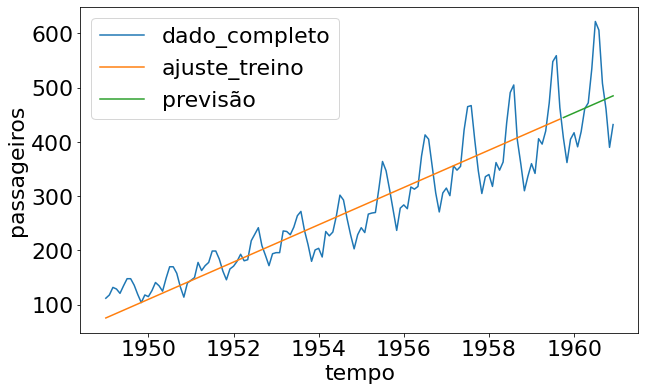

In [30]:
sns.lineplot(x="tempo",y="passageiros",data=passageiros,label='dado_completo')
sns.lineplot(x="tempo",y="passageiros",data=resultado_transf,label='ajuste_treino')
sns.lineplot(x="tempo",y="passageiros",data=resultado_transf_teste,label='previsão')

## Regressão não-linear

In [31]:
regressor2 = Sequential()

In [32]:
regressor2.add(Dense(8, input_dim=1, kernel_initializer='random_uniform', 
                     activation='sigmoid',use_bias=False)) 
regressor2.add(Dense(8, kernel_initializer='random_uniform', 
                     activation='sigmoid',use_bias=False))
regressor2.add(Dense(1, kernel_initializer='random_uniform', 
                     activation='linear',use_bias=False))

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [33]:
regressor2.compile(loss='mean_squared_error',optimizer='adam')
regressor2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 8)                 8         
_________________________________________________________________
dense_2 (Dense)              (None, 8)                 64        
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 8         
Total params: 80
Trainable params: 80
Non-trainable params: 0
_________________________________________________________________


In [34]:
regressor2.fit(xtreino,ytreino,epochs =500)

Epoch 1/500
129/129 [==============================] - 0s 857us/sample - loss: 0.7980
Epoch 2/500
129/129 [==============================] - 0s 53us/sample - loss: 0.7954
Epoch 3/500
129/129 [==============================] - 0s 52us/sample - loss: 0.7954
Epoch 4/500
129/129 [==============================] - 0s 53us/sample - loss: 0.7943
Epoch 5/500
129/129 [==============================] - 0s 61us/sample - loss: 0.7922
Epoch 6/500
129/129 [==============================] - 0s 57us/sample - loss: 0.7910
Epoch 7/500
129/129 [==============================] - 0s 60us/sample - loss: 0.7914
Epoch 8/500
129/129 [==============================] - 0s 72us/sample - loss: 0.7913
Epoch 9/500
129/129 [==============================] - 0s 79us/sample - loss: 0.7901
Epoch 10/500
129/129 [==============================] - 0s 73us/sample - loss: 0.7888
Epoch 11/500
129/129 [==============================] - 0s 57us/sample - loss: 0.7873
Epoch 12/500
129/129 [==============================] - 0s 73u

129/129 [==============================] - 0s 52us/sample - loss: 0.7582
Epoch 97/500
129/129 [==============================] - 0s 59us/sample - loss: 0.7577
Epoch 98/500
129/129 [==============================] - 0s 61us/sample - loss: 0.7570
Epoch 99/500
129/129 [==============================] - 0s 57us/sample - loss: 0.7560
Epoch 100/500
129/129 [==============================] - 0s 69us/sample - loss: 0.7561
Epoch 101/500
129/129 [==============================] - 0s 60us/sample - loss: 0.7556
Epoch 102/500
129/129 [==============================] - 0s 63us/sample - loss: 0.7552
Epoch 103/500
129/129 [==============================] - 0s 52us/sample - loss: 0.7553
Epoch 104/500
129/129 [==============================] - 0s 56us/sample - loss: 0.7546
Epoch 105/500
129/129 [==============================] - 0s 52us/sample - loss: 0.7536
Epoch 106/500
129/129 [==============================] - 0s 65us/sample - loss: 0.7528
Epoch 107/500
129/129 [==============================] - 0s 

129/129 [==============================] - 0s 74us/sample - loss: 0.6407
Epoch 191/500
129/129 [==============================] - 0s 52us/sample - loss: 0.6390
Epoch 192/500
129/129 [==============================] - 0s 53us/sample - loss: 0.6377
Epoch 193/500
129/129 [==============================] - 0s 60us/sample - loss: 0.6358
Epoch 194/500
129/129 [==============================] - 0s 58us/sample - loss: 0.6342
Epoch 195/500
129/129 [==============================] - 0s 56us/sample - loss: 0.6326
Epoch 196/500
129/129 [==============================] - 0s 52us/sample - loss: 0.6309
Epoch 197/500
129/129 [==============================] - 0s 63us/sample - loss: 0.6295
Epoch 198/500
129/129 [==============================] - 0s 52us/sample - loss: 0.6283
Epoch 199/500
129/129 [==============================] - 0s 54us/sample - loss: 0.6267
Epoch 200/500
129/129 [==============================] - 0s 49us/sample - loss: 0.6252
Epoch 201/500
129/129 [==============================] - 

129/129 [==============================] - 0s 51us/sample - loss: 0.4785
Epoch 285/500
129/129 [==============================] - 0s 57us/sample - loss: 0.4770
Epoch 286/500
129/129 [==============================] - 0s 47us/sample - loss: 0.4756
Epoch 287/500
129/129 [==============================] - 0s 57us/sample - loss: 0.4741
Epoch 288/500
129/129 [==============================] - 0s 47us/sample - loss: 0.4722
Epoch 289/500
129/129 [==============================] - 0s 62us/sample - loss: 0.4706
Epoch 290/500
129/129 [==============================] - 0s 47us/sample - loss: 0.4689
Epoch 291/500
129/129 [==============================] - 0s 57us/sample - loss: 0.4675
Epoch 292/500
129/129 [==============================] - 0s 48us/sample - loss: 0.4655
Epoch 293/500
129/129 [==============================] - 0s 68us/sample - loss: 0.4641
Epoch 294/500
129/129 [==============================] - 0s 50us/sample - loss: 0.4630
Epoch 295/500
129/129 [==============================] - 

129/129 [==============================] - 0s 52us/sample - loss: 0.3484
Epoch 379/500
129/129 [==============================] - 0s 58us/sample - loss: 0.3472
Epoch 380/500
129/129 [==============================] - 0s 57us/sample - loss: 0.3463
Epoch 381/500
129/129 [==============================] - 0s 58us/sample - loss: 0.3454
Epoch 382/500
129/129 [==============================] - 0s 56us/sample - loss: 0.3438
Epoch 383/500
129/129 [==============================] - 0s 53us/sample - loss: 0.3417
Epoch 384/500
129/129 [==============================] - 0s 47us/sample - loss: 0.3395
Epoch 385/500
129/129 [==============================] - 0s 52us/sample - loss: 0.3381
Epoch 386/500
129/129 [==============================] - 0s 53us/sample - loss: 0.3369
Epoch 387/500
129/129 [==============================] - 0s 58us/sample - loss: 0.3358
Epoch 388/500
129/129 [==============================] - 0s 78us/sample - loss: 0.3346
Epoch 389/500
129/129 [==============================] - 

129/129 [==============================] - 0s 61us/sample - loss: 0.2548
Epoch 473/500
129/129 [==============================] - 0s 51us/sample - loss: 0.2542
Epoch 474/500
129/129 [==============================] - 0s 57us/sample - loss: 0.2535
Epoch 475/500
129/129 [==============================] - 0s 51us/sample - loss: 0.2530
Epoch 476/500
129/129 [==============================] - 0s 58us/sample - loss: 0.2524
Epoch 477/500
129/129 [==============================] - 0s 49us/sample - loss: 0.2513
Epoch 478/500
129/129 [==============================] - 0s 54us/sample - loss: 0.2505
Epoch 479/500
129/129 [==============================] - 0s 64us/sample - loss: 0.2493
Epoch 480/500
129/129 [==============================] - 0s 59us/sample - loss: 0.2486
Epoch 481/500
129/129 [==============================] - 0s 52us/sample - loss: 0.2479
Epoch 482/500
129/129 [==============================] - 0s 59us/sample - loss: 0.2470
Epoch 483/500
129/129 [==============================] - 

In [35]:
y_predict= regressor2.predict(xtreino) #Prevendo os dados de treino (o ajuste)

In [36]:
y_predict_teste= regressor2.predict(xteste) #Prevendo os dados de teste(o futuro)

<AxesSubplot:>

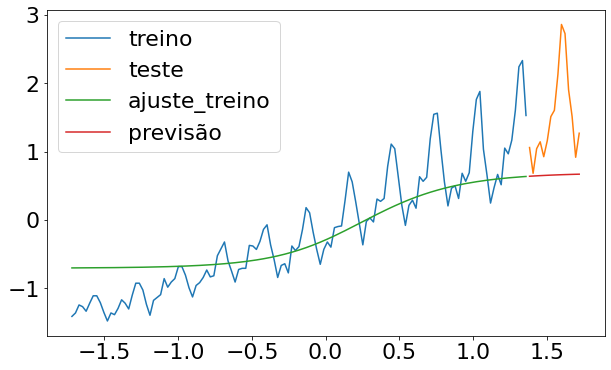

In [37]:
sns.lineplot(x=xtreino,y=ytreino,label='treino')
sns.lineplot(x=xteste,y=yteste,label='teste')
sns.lineplot(x=xtreino,y=y_predict[:,0],label='ajuste_treino')
sns.lineplot(x=xteste,y=y_predict_teste[:,0],label='previsão')

# Aula 3

## Alterando a forma como passamos os dados

Agora x e y vão valores diferentes. X vai conter o número de passageiros em um tempo anterior e y vai conter o número de passageiros em t+1, por exemplo. 

In [38]:
vetor = pd.DataFrame(ytreino)[0]

In [39]:
def separa_dados(vetor,n_passos):
  """Entrada: vetor: número de passageiros
               n_passos: número de passos no regressor
     Saída:
              X_novo: Array 2D 
              y_novo: Array 1D - Nosso alvo
  """
  X_novo, y_novo = [], []
  for i in range(n_passos,vetor.shape[0]):
    X_novo.append(list(vetor.loc[i-n_passos:i-1]))
    y_novo.append(vetor.loc[i])
  X_novo, y_novo = np.array(X_novo), np.array(y_novo) 
  return X_novo, y_novo

In [40]:
xtreino_novo, ytreino_novo = separa_dados(vetor,1)

In [41]:
xtreino_novo[0:5] #X

array([[-1.40777884],
       [-1.35759023],
       [-1.24048348],
       [-1.26557778],
       [-1.33249593]])

In [42]:
ytreino_novo[0:5] #y

array([-1.35759023, -1.24048348, -1.26557778, -1.33249593, -1.21538918])

## Agora vamos separar o teste

In [43]:
vetor2 = pd.DataFrame(yteste)[0]

In [44]:
xteste_novo, yteste_novo = separa_dados(vetor2,1)

## Voltando para as redes neurais

In [45]:
regressor3 = Sequential()

In [46]:
regressor3.add(Dense(8, input_dim=1, kernel_initializer='ones', activation='linear',use_bias=False))
regressor3.add(Dense(64, kernel_initializer='random_uniform', activation='sigmoid',use_bias=False))
regressor3.add(Dense(1, kernel_initializer='random_uniform', activation='linear',use_bias=False))
regressor3.compile(loss='mean_squared_error',optimizer='adam')
regressor3.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 8)                 8         
_________________________________________________________________
dense_5 (Dense)              (None, 64)                512       
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 64        
Total params: 584
Trainable params: 584
Non-trainable params: 0
_________________________________________________________________


In [47]:
regressor3.fit(xtreino_novo,ytreino_novo,epochs =100)

Epoch 1/100
128/128 [==============================] - 0s 942us/sample - loss: 0.7695
Epoch 2/100
128/128 [==============================] - 0s 53us/sample - loss: 0.7466
Epoch 3/100
128/128 [==============================] - 0s 88us/sample - loss: 0.7277
Epoch 4/100
128/128 [==============================] - 0s 54us/sample - loss: 0.7073
Epoch 5/100
128/128 [==============================] - 0s 65us/sample - loss: 0.6848
Epoch 6/100
128/128 [==============================] - 0s 79us/sample - loss: 0.6620
Epoch 7/100
128/128 [==============================] - 0s 54us/sample - loss: 0.6352
Epoch 8/100
128/128 [==============================] - 0s 58us/sample - loss: 0.6077
Epoch 9/100
128/128 [==============================] - 0s 56us/sample - loss: 0.5789
Epoch 10/100
128/128 [==============================] - 0s 78us/sample - loss: 0.5441
Epoch 11/100
128/128 [==============================] - 0s 61us/sample - loss: 0.5101
Epoch 12/100
128/128 [==============================] - 0s 73u

128/128 [==============================] - 0s 46us/sample - loss: 0.0626
Epoch 97/100
128/128 [==============================] - 0s 65us/sample - loss: 0.0627
Epoch 98/100
128/128 [==============================] - 0s 55us/sample - loss: 0.0626
Epoch 99/100
128/128 [==============================] - 0s 50us/sample - loss: 0.0628
Epoch 100/100
128/128 [==============================] - 0s 46us/sample - loss: 0.0626


In [48]:
y_predict_novo = regressor3.predict(xtreino_novo)

<AxesSubplot:xlabel='tempo', ylabel='0'>

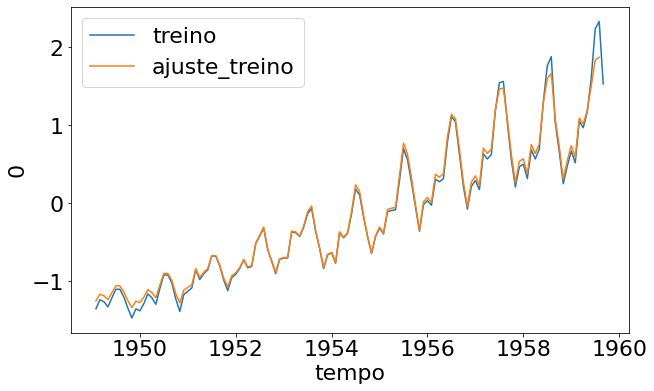

In [49]:
sns.lineplot(x='tempo',y=ytreino_novo,data=passageiros[1:129],label='treino')
sns.lineplot(x='tempo',y=pd.DataFrame(y_predict_novo)[0],data=passageiros[1:129],label='ajuste_treino')

In [50]:
y_predict_teste_novo = regressor3.predict(xteste_novo)

In [51]:
resultado = pd.DataFrame(y_predict_teste_novo)[0]

<AxesSubplot:xlabel='tempo', ylabel='0'>

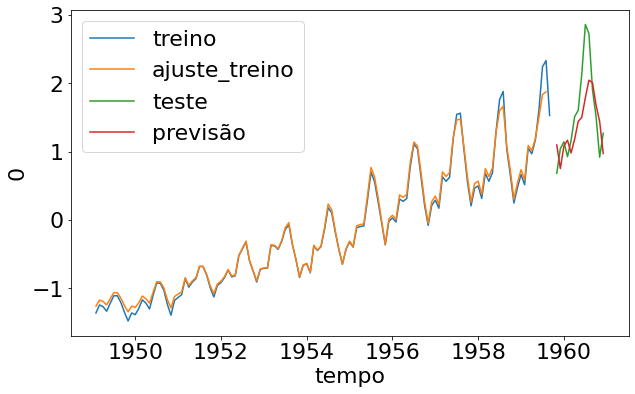

In [52]:
sns.lineplot(x='tempo',y=ytreino_novo,data=passageiros[1:129],label='treino')
sns.lineplot(x='tempo',y=pd.DataFrame(y_predict_novo)[0],data=passageiros[1:129],label='ajuste_treino')

sns.lineplot(x='tempo',y=yteste_novo,data=passageiros[130:144],label='teste')
sns.lineplot(x='tempo',y=resultado.values,data=passageiros[130:144],label='previsão')

## Janelas

In [53]:
xtreino_novo, ytreino_novo = separa_dados(vetor,4)

In [54]:
xtreino_novo[0:5] #X

array([[-1.40777884, -1.35759023, -1.24048348, -1.26557778],
       [-1.35759023, -1.24048348, -1.26557778, -1.33249593],
       [-1.24048348, -1.26557778, -1.33249593, -1.21538918],
       [-1.26557778, -1.33249593, -1.21538918, -1.10664719],
       [-1.33249593, -1.21538918, -1.10664719, -1.10664719]])

In [55]:
ytreino_novo[0:5] #y

array([-1.33249593, -1.21538918, -1.10664719, -1.10664719, -1.20702441])

In [56]:
xteste_novo, yteste_novo = separa_dados(vetor2,4)

In [57]:
regressor4 = Sequential()

In [58]:
regressor4.add(Dense(8, input_dim=4, kernel_initializer='random_uniform', activation='linear',use_bias=False)) #relu
regressor4.add(Dense(64, kernel_initializer='random_uniform', activation='sigmoid',use_bias=False)) #relu
regressor4.add(Dense(1, kernel_initializer='random_uniform', activation='linear',use_bias=False))
regressor4.compile(loss='mean_squared_error',optimizer='adam')
regressor4.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 8)                 32        
_________________________________________________________________
dense_8 (Dense)              (None, 64)                512       
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 64        
Total params: 608
Trainable params: 608
Non-trainable params: 0
_________________________________________________________________


In [59]:
regressor4.fit(xtreino_novo,ytreino_novo,epochs =300)

Epoch 1/300
125/125 [==============================] - 0s 950us/sample - loss: 0.7828
Epoch 2/300
125/125 [==============================] - 0s 87us/sample - loss: 0.7611
Epoch 3/300
125/125 [==============================] - 0s 61us/sample - loss: 0.7602
Epoch 4/300
125/125 [==============================] - 0s 67us/sample - loss: 0.7602
Epoch 5/300
125/125 [==============================] - 0s 53us/sample - loss: 0.7579
Epoch 6/300
125/125 [==============================] - 0s 70us/sample - loss: 0.7529
Epoch 7/300
125/125 [==============================] - 0s 63us/sample - loss: 0.7473
Epoch 8/300
125/125 [==============================] - 0s 74us/sample - loss: 0.7414
Epoch 9/300
125/125 [==============================] - 0s 81us/sample - loss: 0.7351
Epoch 10/300
125/125 [==============================] - 0s 59us/sample - loss: 0.7280
Epoch 11/300
125/125 [==============================] - 0s 64us/sample - loss: 0.7181
Epoch 12/300
125/125 [==============================] - 0s 73u

125/125 [==============================] - 0s 53us/sample - loss: 0.1003
Epoch 97/300
125/125 [==============================] - 0s 49us/sample - loss: 0.1003
Epoch 98/300
125/125 [==============================] - 0s 50us/sample - loss: 0.0990
Epoch 99/300
125/125 [==============================] - 0s 52us/sample - loss: 0.0983
Epoch 100/300
125/125 [==============================] - 0s 50us/sample - loss: 0.0985
Epoch 101/300
125/125 [==============================] - 0s 58us/sample - loss: 0.0974
Epoch 102/300
125/125 [==============================] - 0s 54us/sample - loss: 0.0969
Epoch 103/300
125/125 [==============================] - 0s 49us/sample - loss: 0.0962
Epoch 104/300
125/125 [==============================] - 0s 68us/sample - loss: 0.0955
Epoch 105/300
125/125 [==============================] - 0s 43us/sample - loss: 0.0947
Epoch 106/300
125/125 [==============================] - 0s 67us/sample - loss: 0.0942
Epoch 107/300
125/125 [==============================] - 0s 

125/125 [==============================] - 0s 53us/sample - loss: 0.0670
Epoch 191/300
125/125 [==============================] - 0s 46us/sample - loss: 0.0669
Epoch 192/300
125/125 [==============================] - 0s 55us/sample - loss: 0.0667
Epoch 193/300
125/125 [==============================] - 0s 89us/sample - loss: 0.0666
Epoch 194/300
125/125 [==============================] - 0s 80us/sample - loss: 0.0664
Epoch 195/300
125/125 [==============================] - 0s 49us/sample - loss: 0.0663
Epoch 196/300
125/125 [==============================] - 0s 52us/sample - loss: 0.0662
Epoch 197/300
125/125 [==============================] - 0s 56us/sample - loss: 0.0660
Epoch 198/300
125/125 [==============================] - 0s 60us/sample - loss: 0.0659
Epoch 199/300
125/125 [==============================] - 0s 49us/sample - loss: 0.0659
Epoch 200/300
125/125 [==============================] - 0s 47us/sample - loss: 0.0658
Epoch 201/300
125/125 [==============================] - 

125/125 [==============================] - 0s 91us/sample - loss: 0.0593
Epoch 285/300
125/125 [==============================] - 0s 62us/sample - loss: 0.0593
Epoch 286/300
125/125 [==============================] - 0s 54us/sample - loss: 0.0591
Epoch 287/300
125/125 [==============================] - 0s 54us/sample - loss: 0.0590
Epoch 288/300
125/125 [==============================] - 0s 49us/sample - loss: 0.0593
Epoch 289/300
125/125 [==============================] - 0s 56us/sample - loss: 0.0590
Epoch 290/300
125/125 [==============================] - 0s 53us/sample - loss: 0.0588
Epoch 291/300
125/125 [==============================] - 0s 51us/sample - loss: 0.0590
Epoch 292/300
125/125 [==============================] - 0s 53us/sample - loss: 0.0594
Epoch 293/300
125/125 [==============================] - 0s 41us/sample - loss: 0.0591
Epoch 294/300
125/125 [==============================] - 0s 63us/sample - loss: 0.0590
Epoch 295/300
125/125 [==============================] - 

In [60]:
y_predict_teste_novo = regressor4.predict(xteste_novo)

In [61]:
resultado = pd.DataFrame(y_predict_teste_novo)[0]

<AxesSubplot:xlabel='tempo', ylabel='0'>

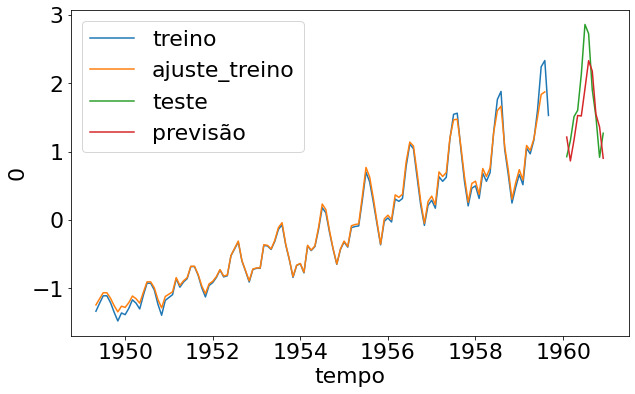

In [62]:
sns.lineplot(x='tempo',y=ytreino_novo,data=passageiros[4:129],label='treino')
sns.lineplot(x='tempo',y=pd.DataFrame(y_predict_novo)[0],data=passageiros[4:129],label='ajuste_treino')

sns.lineplot(x='tempo',y=yteste_novo,data=passageiros[133:144],label='teste')
sns.lineplot(x='tempo',y=resultado.values,data=passageiros[133:144],label='previsão')

# Aula 4

## LSTMs

In [63]:
#Nova base de dados

In [64]:
def carregar_dados_bike():
    bike = pd.read_csv('bicicletas.csv')
    return bike

bike = carregar_dados_bike()
bike.head()

,datas,contagem,temperatura,sensacao,umidade,vel_vento,clima,feriado,final_ds,estacao
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0


In [65]:
bike['datas'] = pd.to_datetime(bike['datas'])

(array([16436., 16526., 16617., 16709., 16801., 16892., 16983., 17075.,
        17167.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

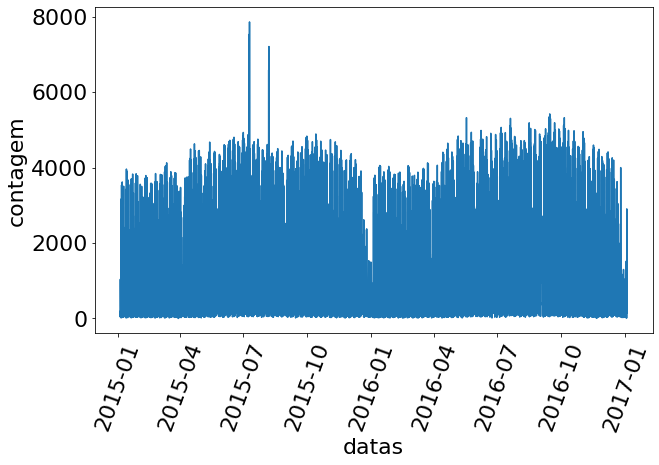

In [66]:
sns.lineplot(x='datas',y='contagem', data=bike)
plt.xticks(rotation=70)

## Escalando os dados

## Dividindo em treino e teste

In [67]:
sc2 = StandardScaler()

def escalar_dados_bike():
    sc2.fit(bike['contagem'].values.reshape(-1,1))
    y = sc2.transform(bike['contagem'].values.reshape(-1,1))
    ytreino = y[0:tamanho_treino]
    yteste = y[tamanho_treino:len(bike)]
    
    return ytreino, yteste

tamanho_treino = int(len(bike)*0.8)
ytreino, yteste = escalar_dados_bike()

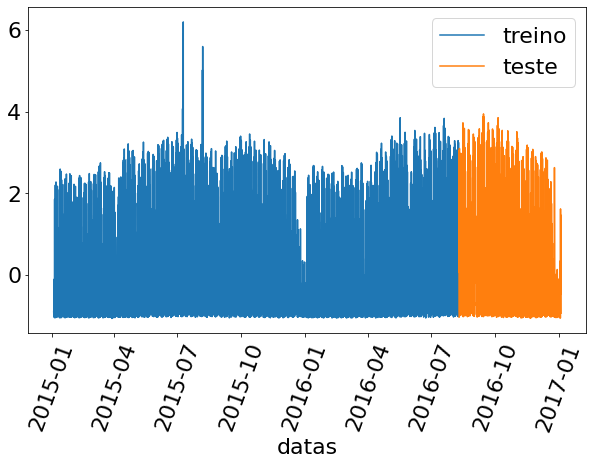

In [68]:
def plotar_dados_bike(y, dados, label):
    sns.lineplot(x='datas',y=y,data=dados,label=label)
    plt.xticks(rotation=70)

plotar_dados_bike(ytreino[:,0], bike[0:tamanho_treino], 'treino')    
plotar_dados_bike(yteste[:,0], bike[tamanho_treino:len(bike)], 'teste')

In [69]:
vetor = pd.DataFrame(ytreino)[0]
xtreino_novo, ytreino_novo = separa_dados(vetor,10)

In [70]:
xtreino_novo[0:5]

array([[-0.88574518, -0.9262953 , -0.92998167, -0.98712048, -1.01016032,
        -1.01108192, -1.00647395, -0.9843557 , -0.93274645, -0.77607553],
       [-0.9262953 , -0.92998167, -0.98712048, -1.01016032, -1.01108192,
        -1.00647395, -0.9843557 , -0.93274645, -0.77607553, -0.56687377],
       [-0.92998167, -0.98712048, -1.01016032, -1.01108192, -1.00647395,
        -0.9843557 , -0.93274645, -0.77607553, -0.56687377, -0.38347663],
       [-0.98712048, -1.01016032, -1.01108192, -1.00647395, -0.9843557 ,
        -0.93274645, -0.77607553, -0.56687377, -0.38347663, -0.25906149],
       [-1.01016032, -1.01108192, -1.00647395, -0.9843557 , -0.93274645,
        -0.77607553, -0.56687377, -0.38347663, -0.25906149, -0.20929543]])

In [71]:
ytreino_novo[0:5]

array([-0.56687377, -0.38347663, -0.25906149, -0.20929543, -0.09593941])

In [72]:
vetor2 = pd.DataFrame(yteste)[0]

In [73]:
xteste_novo, yteste_novo = separa_dados(vetor2,10)

## O que a LSTM espera

A entrada de redes recorrentes deve possuir a seguinte forma para a entrada (número de amostras, número de passos no tempo, e número de atributos por passo no tempo).

In [74]:
xtreino_novo = xtreino_novo.reshape((xtreino_novo.shape[0],xtreino_novo.shape[1],1))

In [75]:
xtreino_novo.shape

(13921, 10, 1)

In [76]:
xteste_novo = xteste_novo.reshape((xteste_novo.shape[0],xteste_novo.shape[1],1))

## Usando a LSTM

In [77]:
from tensorflow.keras.layers import LSTM

In [78]:
recorrente = Sequential()

In [79]:
recorrente.add(LSTM(128, input_shape=(xtreino_novo.shape[1],xtreino_novo.shape[2])
                    ))
recorrente.add(Dense(units=1))

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [80]:
recorrente.compile(loss='mean_squared_error',optimizer='RMSProp')
recorrente.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 128)               66560     
_________________________________________________________________
dense_10 (Dense)             (None, 1)                 129       
Total params: 66,689
Trainable params: 66,689
Non-trainable params: 0
_________________________________________________________________


In [81]:
resultado = recorrente.fit(xtreino_novo,ytreino_novo,validation_data=(xteste_novo,yteste_novo),epochs=100)

Train on 13921 samples, validate on 3473 samples
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Epoch 1/100
13921/13921 [==============================] - 6s 420us/sample - loss: 0.2802 - val_loss: 0.1342
Epoch 2/100
13921/13921 [==============================] - 5s 355us/sample - loss: 0.0872 - val_loss: 0.0733
Epoch 3/100
13921/13921 [==============================] - 5s 356us/sample - loss: 0.0637 - val_loss: 0.0535
Epoch 4/100
13921/13921 [==============================] - 5s 364us/sample - loss: 0.0523 - val_loss: 0.0655
Epoch 5/100
13921/13921 [==============================] - 5s 342us/sample - loss: 0.0459 - val_loss: 0.0445
Epoch 6/100
13921/13921 [==============================] - 5s 342us/sample - loss: 0.0423 - val_loss: 0.0575
Epoch 7/100
13921/13921 [==============================] - 5s 342us/sample - loss: 0.0390 - val_loss: 0.0414
Epoch 8/100
13921/13921 [==============================] - 5s 345us/sample - loss: 0.0366 - va

Epoch 72/100
13921/13921 [==============================] - 5s 394us/sample - loss: 0.0183 - val_loss: 0.0244
Epoch 73/100
13921/13921 [==============================] - 5s 394us/sample - loss: 0.0184 - val_loss: 0.0219
Epoch 74/100
13921/13921 [==============================] - 6s 396us/sample - loss: 0.0182 - val_loss: 0.0274
Epoch 75/100
13921/13921 [==============================] - 6s 398us/sample - loss: 0.0184 - val_loss: 0.0243
Epoch 76/100
13921/13921 [==============================] - 5s 395us/sample - loss: 0.0178 - val_loss: 0.0238
Epoch 77/100
13921/13921 [==============================] - 6s 397us/sample - loss: 0.0178 - val_loss: 0.0239
Epoch 78/100
13921/13921 [==============================] - 6s 398us/sample - loss: 0.0178 - val_loss: 0.0233
Epoch 79/100
13921/13921 [==============================] - 5s 395us/sample - loss: 0.0177 - val_loss: 0.0213
Epoch 80/100
13921/13921 [==============================] - 6s 398us/sample - loss: 0.0177 - val_loss: 0.0218
Epoch 81/1

In [82]:
y_ajustado = recorrente.predict(xtreino_novo)

(array([16436., 16495., 16556., 16617., 16679., 16740., 16801., 16861.,
        16922., 16983., 17045.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

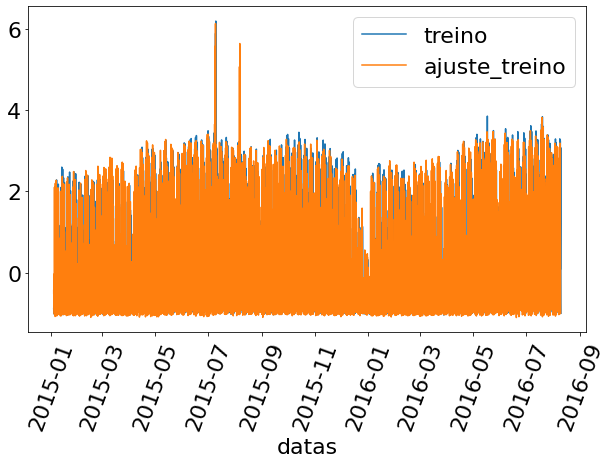

In [84]:
sns.lineplot(x='datas',y=ytreino[:,0],data=bike[0:tamanho_treino],label='treino')
sns.lineplot(x='datas',y=y_ajustado[:,0],data=bike[0:13921],label='ajuste_treino')
plt.xticks(rotation=70) 

In [85]:
y_predito = recorrente.predict(xteste_novo)

(array([17045., 17075., 17106., 17136., 17167.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

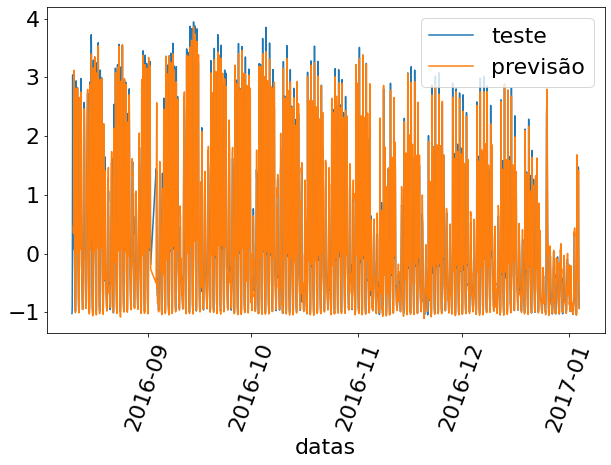

In [87]:
sns.lineplot(x='datas',y=yteste[:,0], data=bike[tamanho_treino:len(bike)],label='teste')
sns.lineplot(x='datas',y=y_predito[:,0], data=bike[tamanho_treino+10:len(bike)],label='previsão'#,marker='.'
            )
plt.xticks(rotation=70) 

## Testando GRU

In [90]:
from tensorflow.keras.layers import GRU

recorrente_gru = Sequential()
recorrente_gru.add(GRU(128, input_shape=(xtreino_novo.shape[1],xtreino_novo.shape[2])))
recorrente_gru.add(Dense(units=1))
recorrente_gru.compile(loss='mean_squared_error',optimizer='RMSProp')
recorrente_gru.summary()
resultado_gru = recorrente_gru.fit(xtreino_novo,ytreino_novo,validation_data=(xteste_novo,yteste_novo),epochs=100)

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_2 (GRU)                  (None, 128)               49920     
_________________________________________________________________
dense_13 (Dense)             (None, 1)                 129       
Total params: 50,049
Trainable params: 50,049
Non-trainable params: 0
_________________________________________________________________
Train on 13921 samples, validate on 3473 samples
Epoch 1/100
13921/13921 [==============================] - 5s 348us/sample - loss: 0.2365 - val_loss: 0.1723
Epoch 2/100
13921/13921 [==============================] - 4s 291us/sample - loss: 0.0768 - val_loss: 0.1612
Epoch 3/100
13921/13921 [==============================] - 4s 298us/sample - loss: 0.0560 - val_loss: 0.0452
Epoch 4/100
13921/13921 [==============================] - 4s 290us/sample - loss: 0.0464 - val_loss: 0.0559
Epoch 5/100
13921/13921 [==

13921/13921 [==============================] - 4s 307us/sample - loss: 0.0194 - val_loss: 0.0245
Epoch 70/100
13921/13921 [==============================] - 4s 289us/sample - loss: 0.0192 - val_loss: 0.0253
Epoch 71/100
13921/13921 [==============================] - 4s 293us/sample - loss: 0.0194 - val_loss: 0.0229
Epoch 72/100
13921/13921 [==============================] - 4s 289us/sample - loss: 0.0191 - val_loss: 0.0248
Epoch 73/100
13921/13921 [==============================] - 5s 329us/sample - loss: 0.0189 - val_loss: 0.0224
Epoch 74/100
13921/13921 [==============================] - 5s 340us/sample - loss: 0.0189 - val_loss: 0.0223
Epoch 75/100
13921/13921 [==============================] - 5s 337us/sample - loss: 0.0193 - val_loss: 0.0221
Epoch 76/100
13921/13921 [==============================] - 4s 313us/sample - loss: 0.0189 - val_loss: 0.0229
Epoch 77/100
13921/13921 [==============================] - 4s 283us/sample - loss: 0.0185 - val_loss: 0.0228
Epoch 78/100
13921/1392

(array([16436., 16495., 16556., 16617., 16679., 16740., 16801., 16861.,
        16922., 16983., 17045.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

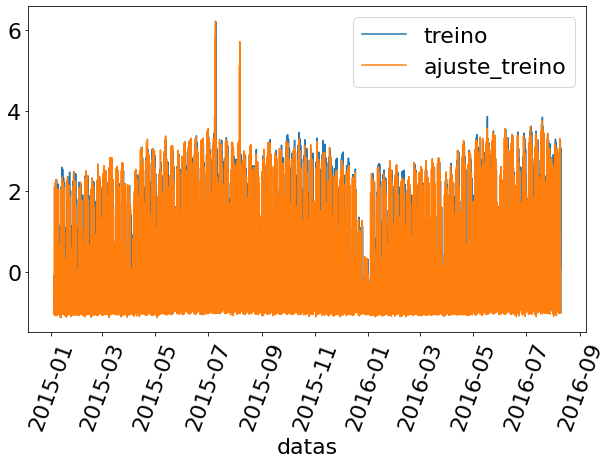

In [91]:
y_ajustado_gru = recorrente_gru.predict(xtreino_novo)
sns.lineplot(x='datas',y=ytreino[:,0],data=bike[0:tamanho_treino],label='treino_gru')
sns.lineplot(x='datas',y=y_ajustado_gru[:,0],data=bike[0:13921],label='ajuste_treino_gru')
plt.xticks(rotation=70) 

In [94]:
y_predito_gru = recorrente_gru.predict(xteste_novo)

In [95]:
print(resultado_gru.history.keys())

dict_keys(['loss', 'val_loss'])


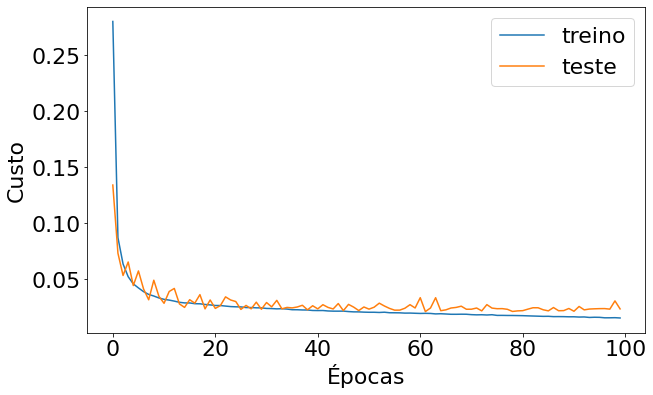

In [100]:
def plotar_custo(resultado_modelo):

    plt.plot(resultado_modelo.history['loss'])
    plt.plot(resultado_modelo.history['val_loss'])
    plt.legend(['treino', 'teste'])
    plt.xlabel('Épocas')
    plt.ylabel('Custo')
    
plotar_custo(resultado)

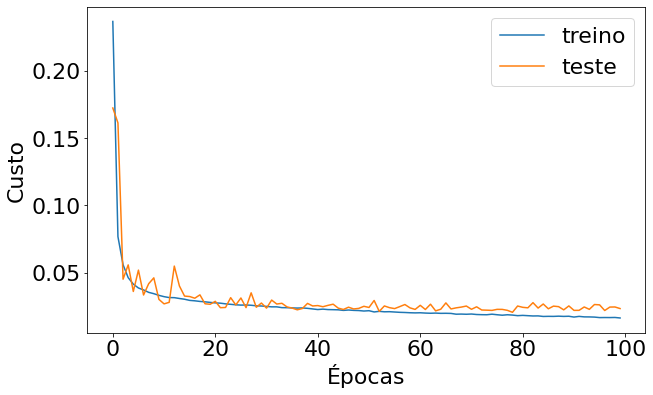

In [101]:
plotar_custo(resultado_gru)